The purpose of this file is to show how to read and clean multiple Excel worksheets from a workbook into python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from sklearn.metrics import r2_score

C:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read the dataframe 
bp = pd.read_excel('bp-energy-outlook-2020-summary-tables.xlsx')

Readint eh excel worksheet allows creating a dataframe with index and name of all worksheets inside the workbook as below

In [3]:
# define country list available in the report
country_list = ['World',
 'United States',
 'Brazil',
 'EU',
 'Russia',
 'Middle East',
 'Africa',
 'China',
 'India',
 'Other Asia']

In [4]:
sectors_int = ['Oil',
 'Natural gas+',
 'Coal',
 'Nuclear',
 'Hydro',
 'Renewables*',
 'Oil (Mbd)',
 'Natural gas+ (Bcm)',
 'Transport',
 'Industry',
 'Non-combusted',
 'Buildings',
 'Inputs to power',
 'Oil',
 'Natural gas+',
 'Coal',
 'Oil (Mbd)',
 'Natural gas+ (Bcm)',
 'Net CO2 emissions (Mt)']

## Complete function to convert the sheet into a clean form

In [5]:
def clean_table_bp(country):
    
    xls = pd.ExcelFile('bp-energy-outlook-2020-summary-tables.xlsx')
    

        #read the dataframe from the sheet
    df = pd.read_excel(xls, country)

        #adjust column anmes
    df.columns =['sector', '1995', '2000','2005', '2010', '2015', '2018', '1995-2018', 
                         'empty1', '2025 Rapid scenario', '2030 Rapid scenario', '2035 Rapid scenario', 
                         '2040 Rapid scenario', '2045 Rapid scenario', '2050 Rapid scenario', '2018-2050', 'empty2', 
                         '2025 Net Zero scenario', '2030 Net Zero scenario', '2035 Net Zero scenario', '2040 Net Zero scenario', 
                         '2045 Net Zero scenario', '2050 Net Zero scenario', '2018-2050', 'empty3', 
                         '2025 Bussiness as usual', '2030 Bussiness as usual', '2035 Bussiness as usual',
                         '2040 Bussiness as usual', '2045 Bussiness as usual', '2050 Bussiness as usual', '2018-2050']

        #create a column name with the country of interest
    df['country'] = country
        
        
        
        #print('Adjusted the column names and dropped the unncessary cols')

        #choose sectors of interest
    df = df[df['sector'].isin(sectors_int)]
        
    #drop the empty rows
    df.drop(['empty1', 'empty2', 'empty3'], axis = 1, inplace = True)
    
            #adjust sector names to differenctiate between consumption and production of fuels 
    for x in [6,7,8,9,10,11,13,14, 25,26,27,29,30]:
        if x<15:
            df.loc[x,'sector'] = df.loc[x,'sector']+' consumption'
        if x>15:
            df.loc[x,'sector'] = df.loc[x,'sector']+' production'
        
        #print("sector amendments")

        #reset_index
    df = df.reset_index()
    return df

## Contstruct a loop to extract data from multiple sheets

In [6]:
# loop over the country list and create a dataframe for each country then append the dataframes

#create an empty dataframe
df_final = pd.DataFrame()

# loop over the country list
for i in country_list:
    
    #perform the function clean_table_bp on each element in the country list
    df = clean_table_bp(i)
    
    # merge the resulting dataframes
    df_final = pd.concat([df, df_final], axis = 0)
    
# return the final dataframe    
df_final
    

,index,sector,1995,2000,2005,2010,2015,2018,1995-2018,2025 Rapid scenario,...,2050 Net Zero scenario,2018-2050,2025 Bussiness as usual,2030 Bussiness as usual,2035 Bussiness as usual,2040 Bussiness as usual,2045 Bussiness as usual,2050 Bussiness as usual,2018-2050,country
0,6,Oil consumption,9.59,11.32,13.00,14.68,16.70,18.19,0.028,19.66,...,5.51,-0.037,20.4,21.38,22.29,22.97,23.47,23.75,0.008,Other Asia
1,7,Natural gas+ consumption,2.98,4.55,6.68,8.16,9.32,9.61,0.052,12.78,...,9.32,-0.001,11.14,12.66,13.75,14.64,15.34,15.75,0.016,Other Asia
2,8,Coal consumption,2.67,3.59,5.21,6.57,7.92,9.68,0.058,10.14,...,1.83,-0.051,12.9,14.95,16.93,18.71,20.26,21.08,0.025,Other Asia
3,9,Nuclear consumption,0.36,0.39,0.41,0.41,0.38,0.34,-0.002,0.48,...,2.49,0.064,0.36,0.36,0.47,0.56,0.67,0.80,0.027,Other Asia
4,10,Hydro consumption,0.92,0.93,1.10,1.37,1.76,2.23,0.039,3.47,...,6.52,0.034,3.37,4.02,4.32,4.60,4.85,5.10,0.026,Other Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,26,Natural gas+ production,75.17,86.49,99.18,113.42,126.05,139.14,0.027,154.49,...,NaN,NaN,153.5,166.27,174.53,180.09,183.77,187.19,0.009,World
15,27,Coal production,94.10,96.48,126.18,150.82,161.68,165.06,0.025,132.93,...,NaN,NaN,155.84,150.40,145.62,137.66,128.82,120.13,-0.01,World
16,29,Oil (Mbd) production,69.21,76.20,83.73,85.59,94.28,97.77,0.015,94.48,...,NaN,NaN,98.17,97.83,96.62,94.05,91.61,89.19,-0.003,World
17,30,Natural gas+ (Bcm) production,2087.93,2402.48,2755.05,3150.69,3501.29,3865.06,0.027,4291.52,...,NaN,NaN,4263.9,4618.66,4847.97,5002.61,5104.60,5199.59,0.009,World


In [7]:
df_final.sector.unique()

array(['Oil consumption', 'Natural gas+ consumption', 'Coal consumption',
       'Nuclear consumption', 'Hydro consumption',
       'Renewables* consumption', 'Oil (Mbd) consumption',
       'Natural gas+ (Bcm) consumption', 'Transport', 'Industry',
       'Non-combusted', 'Buildings', 'Inputs to power', 'Oil production',
       'Natural gas+ production', 'Coal production',
       'Oil (Mbd) production', 'Natural gas+ (Bcm) production',
       'Net CO2 emissions (Mt)'], dtype=object)

In [8]:
df_final.columns

Index(['index', 'sector', '1995', '2000', '2005', '2010', '2015', '2018',
       '1995-2018', '2025 Rapid scenario', '2030 Rapid scenario',
       '2035 Rapid scenario', '2040 Rapid scenario', '2045 Rapid scenario',
       '2050 Rapid scenario', '2018-2050', '2025 Net Zero scenario',
       '2030 Net Zero scenario', '2035 Net Zero scenario',
       '2040 Net Zero scenario', '2045 Net Zero scenario',
       '2050 Net Zero scenario', '2018-2050', '2025 Bussiness as usual',
       '2030 Bussiness as usual', '2035 Bussiness as usual',
       '2040 Bussiness as usual', '2045 Bussiness as usual',
       '2050 Bussiness as usual', '2018-2050', 'country'],
      dtype='object')

## Cleaning for benchmarking

In [10]:
# restructure the final dataframe for benchmarking in a long formate

bp_forecast = df_final.melt(id_vars = ['country', 'sector'],
                           value_vars = ['2025 Rapid scenario', '2030 Rapid scenario',
       '2035 Rapid scenario', '2040 Rapid scenario', '2045 Rapid scenario',
       '2050 Rapid scenario', '2025 Net Zero scenario','2030 Net Zero scenario', '2035 Net Zero scenario',
       '2040 Net Zero scenario', '2045 Net Zero scenario','2050 Net Zero scenario', '2025 Bussiness as usual',
       '2030 Bussiness as usual', '2035 Bussiness as usual','2040 Bussiness as usual', '2045 Bussiness as usual',
       '2050 Bussiness as usual'],
                           var_name = 'year',
                           value_name = 'value')

In [11]:
#create the scenario column

bp_forecast['scenario'] = bp_forecast['year'].apply(lambda x:x[5:])
bp_forecast['Year'] = bp_forecast['year'].apply(lambda x:x[:4])

In [12]:
#define sectors of interest that we want to benchmark their forecast

sec_int = ['Oil consumption', 'Natural gas+ consumption', 'Coal consumption','Nuclear consumption', 'Hydro consumption','Renewables* consumption']
bp_forecast = bp_forecast[bp_forecast['sector'].isin(sec_int)]

In [13]:
#drop empty data
bp_forecast.dropna(inplace = True, axis = 0)
bp_forecast['value'] = bp_forecast['value'].astype('int')

In [14]:
bp_forecast.head()

,country,sector,year,value,scenario,Year
0,Other Asia,Oil consumption,2025 Rapid scenario,19,Rapid scenario,2025
1,Other Asia,Natural gas+ consumption,2025 Rapid scenario,12,Rapid scenario,2025
2,Other Asia,Coal consumption,2025 Rapid scenario,10,Rapid scenario,2025
3,Other Asia,Nuclear consumption,2025 Rapid scenario,0,Rapid scenario,2025
4,Other Asia,Hydro consumption,2025 Rapid scenario,3,Rapid scenario,2025


In [15]:
# add the scenarios as columns 
bp_forecast_sc = pd.pivot_table(bp_forecast, values='value', index=['country', 'sector', 'Year'], columns=['scenario'])


In [20]:
bp_forecast_sc = bp_forecast_sc.reset_index()

In [21]:
bp_forecast_sc

scenario,country,sector,Year,Bussiness as usual,Net Zero scenario,Rapid scenario
0,Africa,Coal consumption,2025,4,4,4
1,Africa,Coal consumption,2030,5,3,3
2,Africa,Coal consumption,2035,5,2,2
3,Africa,Coal consumption,2040,6,1,1
4,Africa,Coal consumption,2045,6,0,1
...,...,...,...,...,...,...
355,World,Renewables* consumption,2030,69,130,99
356,World,Renewables* consumption,2035,89,215,147
357,World,Renewables* consumption,2040,113,296,203
358,World,Renewables* consumption,2045,136,342,249


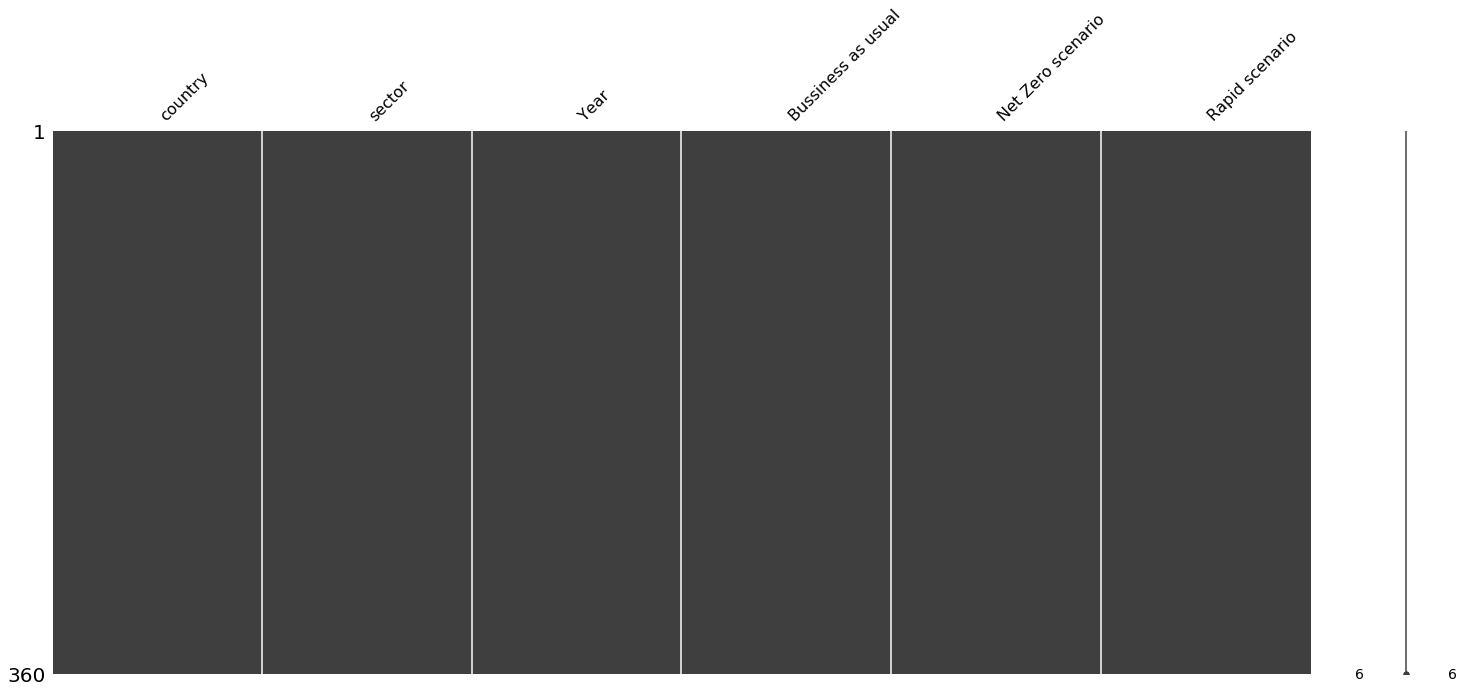

In [24]:
#check the completeness of the data

import missingno as msno
msno.matrix(bp_forecast_sc)

In [45]:
# create the benchmarking dataset and calculate teh similarity score relying on R-square

# create empty dataframe 

col_names = ('country', 'setor', 'SOD')

df_r = pd.DataFrame(columns = col_names)

countries = bp_forecast_sc['country'].unique()
sectors = bp_forecast_sc['sector'].unique()

#filter countries
for country_name in countries:
    df_ = bp_forecast_sc[bp_forecast_sc['country'] == country_name]
    
    # filter sectors
    for sec in sectors:
        df_s = df_[df_['sector']==sec]
        
        #select the columns you want to benchmark
        #R_sq = r2_score(df_s['Bussiness as usual'], df_s['Net Zero scenario'])
        df_s['SOD'] = abs((df_s['Bussiness as usual'] - df_s['Net Zero scenario'])/df_s['Bussiness as usual'])
        sum_of_diff = df_s['SOD'].sum()

        #append the dataframe
        df_r = df_r.append({'country': country_name ,'setor': sec,'SOD':sum_of_diff }, ignore_index = True)
        
df_r
    

C:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,country,setor,SOD
0,Africa,Coal consumption,3.833333
1,Africa,Hydro consumption,1.333333
2,Africa,Natural gas+ consumption,1.893440
3,Africa,Nuclear consumption,inf
4,Africa,Oil consumption,1.916200
5,Africa,Renewables* consumption,inf
6,Brazil,Coal consumption,0.000000
7,Brazil,Hydro consumption,0.583333
8,Brazil,Natural gas+ consumption,2.166667
9,Brazil,Nuclear consumption,0.000000


In [46]:
df_sc_final = pd.pivot_table(df_r, values='SOD', index=['country'],
                    columns=['setor'], aggfunc=np.sum)

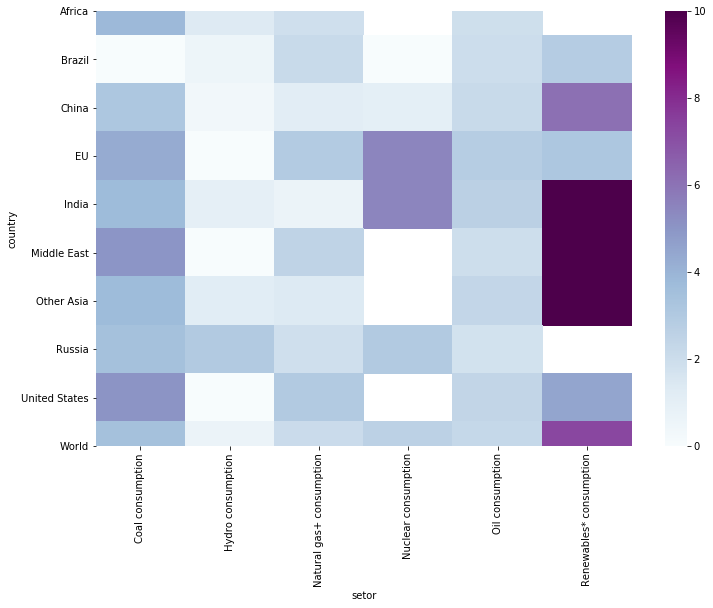

In [51]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_sc_final, vmin=0, vmax=10, cmap="BuPu")
plt.show()

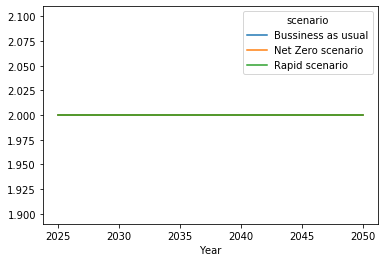

In [58]:
bp_forecast_sc[(bp_forecast_sc['country'] =='United States')& (bp_forecast_sc['sector'] =='Hydro consumption')].plot(x='Year')

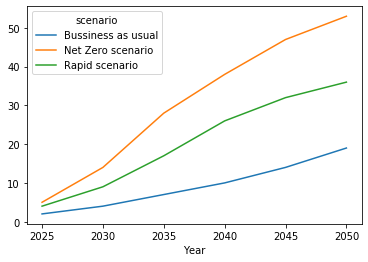

In [57]:
bp_forecast_sc[(bp_forecast_sc['country'] =='India')& (bp_forecast_sc['sector'] =='Renewables* consumption')].plot(x ='Year')

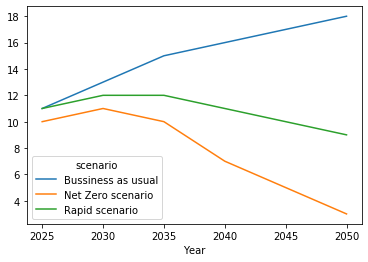

In [61]:
bp_forecast_sc[(bp_forecast_sc['country'] =='India')& (bp_forecast_sc['sector'] =='Oil consumption')].plot(x ='Year')

In [67]:
# filter function and plot 
def filter_plot(df,country,sector):
    df_ = df[(df['country'] ==country)& (df['sector'] ==sector)]
    df_c = df_[['country', 'sector','Year', 'Bussiness as usual','Net Zero scenario' ]].plot(x = 'Year')
    x = str(country)+str(' ')+str(sector)
    plt.title(x)
    plt.show()

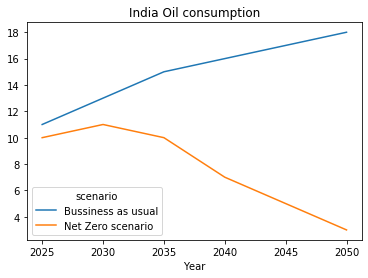

In [68]:
filter_plot(bp_forecast_sc, 'India', 'Oil consumption')

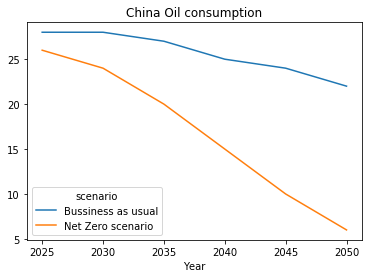

In [69]:
filter_plot(bp_forecast_sc, 'China', 'Oil consumption')

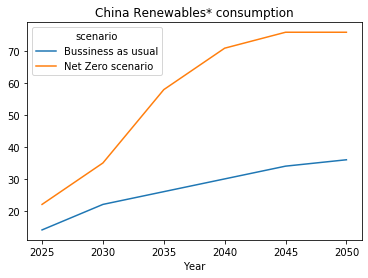

In [70]:
filter_plot(bp_forecast_sc, 'China', 'Renewables* consumption')

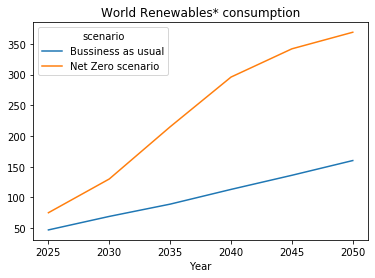

In [71]:
filter_plot(bp_forecast_sc, 'World', 'Renewables* consumption')